<a href="https://colab.research.google.com/github/AshwinKotgire/Play_with_LLMs/blob/main/Prompt_Engineering/LLM_UI_for_multiple_users_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U trl transformers accelerate
!pip install -q datasets bitsandbytes einops wandb
!pip install langchain
!pip install sentence_transformers
# !pip install faiss-cpu
!pip install faiss-gpu
!pip install pypdf
!pip install  tiktoken
!pip install streamlit
!pip install pyngrok
!pip install hugchat

!pip install pypdf2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.0/110.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -q -U trl transformers accelerate
!pip install -q datasets bitsandbytes einops wandb
!pip install langchain
!pip install sentence_transformers
# !pip install faiss-cpu
!pip install faiss-gpu
!pip install pypdf
!pip install  tiktoken
!pip install streamlit
!pip install pyngrok
!pip install hugchat

!pip install pypdf2

In [2]:
from huggingface_hub import login
login()

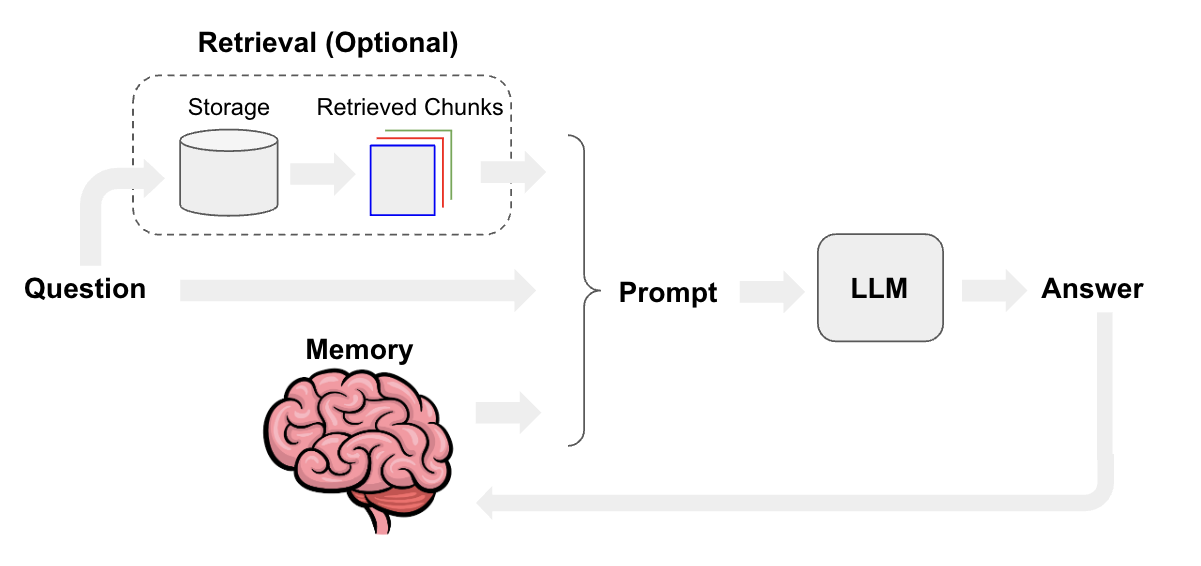

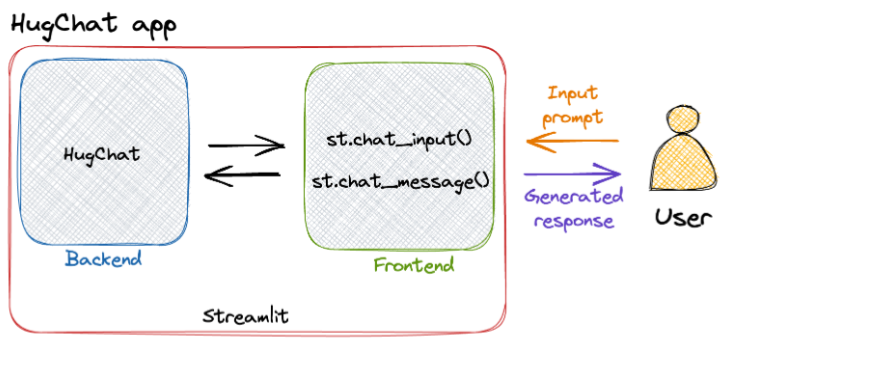

In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from transformers import pipeline
import transformers
import torch

from langchain.embeddings import HuggingFaceEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.document_loaders import TextLoader
from langchain.document_loaders import PyPDFLoader
from langchain.document_loaders import UnstructuredURLLoader
from langchain.document_loaders import UnstructuredPDFLoader
from langchain.document_loaders import PDFMinerPDFasHTMLLoader
from langchain.document_loaders import PDFPlumberLoader
from langchain.text_splitter import TokenTextSplitter

from IPython.display import HTML

from langchain.document_loaders import OnlinePDFLoader


from langchain.text_splitter import SentenceTransformersTokenTextSplitter



In [ ]:
from langchain import embeddings
from langchain.vectorstores import FAISS
from PyPDF2 import PdfReader
from langchain.docstore.document import Document

class user_activity:
  def __init__(self,user_id,chats=[]):
    self.user_id=user_id
    self.chats=chats

class one_model_multiple_users:
  def __init__(self,model,tokenizer,embeddings = HuggingFaceEmbeddings(), \
    text_splitter = SentenceTransformersTokenTextSplitter(chunk_overlap=50)):
    self.model=model
    self.tokenizer=tokenizer
    self.embeddings=embeddings
    self.text_splitter=text_splitter
    self.active_user_dict=[]

    """
    {
      unique_indentifier:
      {
        identifier:unique_identifier,
        documents:[],
        embedded_documents:[]
        chats:[[doc_name,prompt,response],...]
      },
      ...
    }
    """
  def load_new_model_tokenizer(self,model,tokenizer)  :
    self.model=model
    self.tokenizer=tokenizer
  def load_new_embeddings(self,embeddigns):
    self.embeddings=embeddings
  def create_embedding(self,up_file):
    rpdf=PdfReader(up_file)
    docs=[]
    i=0
    for page in rpdf.pages:
      docs.append(Document(page_content=page.extract_text(), metadata={'page':i}))
      i+=1
    docs=self.text_splitter.split_documents(docs)
    db=FAISS.from_documents(docs,self.embeddings)
    return db
  def add_new_doc_to_user(self,user_id,document):
    if document not in self.active_user_dict[user_id]['documents'].append(document):
      self.active_user_dict[user_id]['documents'].append(document)
      self.active_user_dict[user_id]['documents'].append()
      self.active_user_dict[user_id]['embedded_documents'].append(self.create_embedding(user_id))







###Things to do in this notebook
1. Load a common model for all users.
2. Log in multiple users.
3. Get context documents from multiple users and isolate them for thei respective users.
4. Try speeding up answer generation for multiple users.
5. Save the list of chats of all the users.
6. Cater only to active users and remove the vector embeddings and uploaded documents of inactive users.
7. Refernce :https://blog.streamlit.io/how-to-build-an-llm-powered-chatbot-with-streamlit/

In [4]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from transformers import pipeline
import transformers
import torch

from langchain.embeddings import HuggingFaceEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.document_loaders import TextLoader
#from langchain.document_loaders import PyPDFLoader
from PyPDF2 import PdfReader

from langchain.document_loaders import UnstructuredURLLoader
from langchain.document_loaders import UnstructuredPDFLoader
from langchain.document_loaders import PDFMinerPDFasHTMLLoader
from langchain.document_loaders import PDFPlumberLoader
from langchain.text_splitter import TokenTextSplitter

from IPython.display import HTML

from langchain.document_loaders import OnlinePDFLoader
from langchain.docstore.document import Document


from langchain.text_splitter import SentenceTransformersTokenTextSplitter



In [5]:

model_name = "meta-llama/Llama-2-7b-chat-hf"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    trust_remote_code=True
)
model.config.use_cache = False

tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
prompt = 'I liked "Breaking Bad" and "Band of Brothers". Do you have any recommendations of other shows I might like?'
inputs = tokenizer(prompt, return_tensors="pt",padding =True)

In [6]:
%%writefile chatbot.py
import streamlit as st
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from transformers import pipeline
import transformers
import torch

from langchain.embeddings import HuggingFaceEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.document_loaders import TextLoader
#from langchain.document_loaders import PyPDFLoader
from PyPDF2 import PdfReader
from langchain.document_loaders import PyPDFLoader
from langchain.prompts import PromptTemplate

from langchain.document_loaders import UnstructuredURLLoader
from langchain.document_loaders import UnstructuredPDFLoader
from langchain.document_loaders import PDFMinerPDFasHTMLLoader
from langchain.document_loaders import PDFPlumberLoader
from langchain.text_splitter import TokenTextSplitter

from IPython.display import HTML

from langchain.document_loaders import OnlinePDFLoader
from langchain.docstore.document import Document


from langchain.text_splitter import SentenceTransformersTokenTextSplitter


class Cust_Chain_obj():
  def __init__(self,model,tokenizer,FAISS_obj,sys_prompt='',embeddings = HuggingFaceEmbeddings(),text_splitter = SentenceTransformersTokenTextSplitter(chunk_overlap=50)):
    self.FAISS_obj=FAISS_obj
    self.model=model
    self.tokenizer=tokenizer
    self.sys_prompt=sys_prompt
    self.embedding_obj=embeddings
    self.text_splitter_obj=text_splitter
    self.doc=[]
    self.prompt_template=self.create_prompt_template()
  def create_prompt_template(self):
    prompt="""<s>[INST] """+self.sys_prompt+"""
        Context: {context}
        Question: {question}
        [/INST]
        """
    prompt_t=PromptTemplate(input_variables=['context','question'],template=prompt)
    return prompt_t
  def get_device(self):
    if torch.cuda.is_available():
      print('cuda')
      device = torch.device("cuda")  # If GPU is available, use it.
    else:
      device = torch.device("cpu")   # If GPU is not available, use the CPU.
    return device


  def load_pdf_doc(self,doc_path):
    loader=PyPDFLoader(doc_path)
    data=loader.load()
    self.doc=data
    return self.doc

  def set_embedding_obj(self,new_embedding_obj):
    self.embedding_obj=new_embedding_obj

  def set_sys_prompt(self,new_sys_prompt):
    self.sys_prompt=f"<<SYS>>{new_sys_prompt}<</SYS>>"
    self.prompt_template=self.create_prompt_template()

  def set_new_model(self,new_model):
    self.model=new_model

  def populate_vector_store(self,document=None,embedding_obj=None,text_splitter=None):
    if(document==None):
      document=self.doc
    if embedding_obj is None:
      embedding_obj=self.embedding_obj
    if (text_splitter is None):
      text_splitter=self.text_splitter_obj
    docs=text_splitter.split_documents(document)
    self.FAISS_obj=FAISS.from_documents(docs,embedding_obj)

  def retrieve_documents(self,query,k=2):
    contexts=self.FAISS_obj.similarity_search(query,k=k)
    return contexts

  def retrieve_contexts(self,query,k=2,use_contexts=False,cust_context='')  :
    context = "No context available ,answer on your own.\n"
    meta_datas=[]
    if(use_contexts==True):
      contexts=self.retrieve_documents(query,k)
      cc=''
      for c in contexts:
        cc+=c.page_content
        meta_datas.append(c.metadata)
        cc+=' ||| '
      if(len(cc)!=0  ):
        context=cc
      context+=cust_context
    return context,meta_datas

  def run(self,query,k=2,use_contexts_from_doc=False,cust_context=''):
    context,metadata=self.retrieve_contexts(query,k,use_contexts_from_doc,cust_context)
    prompt=self.prompt_template.format(context=context,question=query)
    inputs = self.tokenizer(prompt, return_tensors="pt",padding =True).to(self.get_device())
    generate_ids = self.model.generate(inputs.input_ids, max_length=2000)
    p=generate_ids[0]
    output=self.tokenizer.decode(p, skip_special_tokens=True, clean_up_tokenization_spaces=True)
    return metadata,output

if 'enable_chat' not in st.session_state:
  st.session_state.enable_chat=False
if 'uploaded_document' not in st.session_state:
  st.session_state.uploaded_document=None

@st.cache_resource
def load_model():

  model_name = "meta-llama/Llama-2-7b-chat-hf"

  bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
  )

  model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    trust_remote_code=True
  )
  model.config.use_cache = False

  tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
  tokenizer.pad_token = tokenizer.eos_token
  st.write('Model loaded')
  return model,tokenizer

#cahe resource later
def authenticate(email,password):
  a,b,c=out.columns(3)
  with b:
    st.write(email,password)
  st.session_state.enable_chat=True


with st.sidebar:
  email=st.text_input('Email id',key='email',value='JJJJJ')
  password=st.text_input('Password',key='password',type='password',value='JJJJJ')
  st.button('Login',on_click=authenticate,args=[email,password])
  out=st.container()
  out.empty()

@st.cache_resource
def create_cust_chain(_model,_tokenizer,_FAISS_obj,_sys_prompt):
  return Cust_Chain_obj(_model,_tokenizer,_FAISS_obj,_sys_prompt)

def populate_vector_store(_chain,_up_doc):
  pdf_reader = PdfReader(_up_doc)
  # st.write(pdf_reader)
  docs=[]
  i=1
  text = ""
  for page in pdf_reader.pages:
    docs.append(Document(page_content=page.extract_text(), metadata={'page':i}))
    i+=1
  _chain.FAISS_obj=FAISS
  _chain.populate_vector_store(docs)

if(st.session_state.enable_chat)  :
  model,tokenizer=load_model()
  uploaded_doc=st.file_uploader('Upload the pdf here',type='pdf')
  sys_prompt='<<SYS>>Answer the given question while refering to the context if the context is available,else answer the question on your own.<</SYS>>'
  st.session_state.cust_chain=create_cust_chain(model,tokenizer,FAISS,sys_prompt)
  use_contexts=False

  if (uploaded_doc is not None):
    st.session_state.uploaded_document=uploaded_doc
    populate_vector_store(st.session_state.cust_chain,uploaded_doc)
    use_contexts=True
  elif(uploaded_doc is None)  :
    st.session_state.uploaded_document=None
    st.session_state.cust_chain.doc=[]
    st.session_state.cust_chain.FAISS_obj=None
    use_contexts=False
  st.write('USe contexts:',use_contexts)
  if "messages" not in st.session_state.keys():
    st.session_state.messages = [{"role": "assistant", "content": "How may I help you?"}]

  # Display chat messages
  for message in st.session_state.messages:
    with st.chat_message(message["role"]):
      st.write(message["content"])
  prompt=None
  # User-provided prompt
  if prompt := st.chat_input():
    st.session_state.messages.append({"role": "user", "content": prompt})
    with st.chat_message("user"):
      st.write(prompt)

  # Generate a new response if last message is not from assistant
  if st.session_state.messages[-1]["role"] != "assistant" and st.session_state.enable_chat:
    with st.chat_message("assistant"):
      with st.spinner("Thinking..."):
        response = st.session_state.cust_chain.run(prompt,3,use_contexts)[1]
        st.write(response)

    message = {"role": "assistant", "content": response}
    st.session_state.messages.append(message)











Writing chatbot.py


In [ ]:
!pip install pyngrok
!pip install streamlit


In [8]:
from pyngrok import ngrok
ngrok.set_auth_token('2U6GDEjAMFtPezIMgNRPFzvPZGE_2EY17aWeK1e5jedmY1E9k')
!nohup streamlit run chatbot.py --server.port 400 &

url = ngrok.connect('400')
print(url)


nohup: appending output to 'nohup.out'
NgrokTunnel: "https://0fca-34-142-249-200.ngrok-free.app" -> "http://localhost:400"


In [ ]:
!ps aux | grep "python chatbot.py.py"


root        9827  0.0  0.0   7372  3372 ?        S    11:17   0:00 /bin/bash -c ps aux | grep "python chatbot.py.py"
root        9829  0.0  0.0   6624  2284 ?        S    11:17   0:00 grep python chatbot.py.py
